In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
from pandas.io.json import json_normalize
import seaborn as sns
import geopandas as gpd

In [105]:
businesses = pd.read_csv('Businesses.csv')

In [106]:
health = pd.read_csv('health.csv')

In [107]:
death = pd.read_csv('deaths.csv')

In [108]:
shape_file = "/Users/adithyansubramanian/desktop/Data_science/Springboard/Chicago_project/Boundaries - Community Areas (current)/geo_export_594e9584-881e-41f7-a4a2-9c52b3e5beea.shp"
data = gpd.read_file(shape_file)

In [109]:
health['community'] = health['Community Area Name']
health['community'] = health['community'].str.upper()

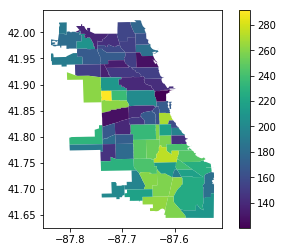

In [110]:
data1.plot(column='Cancer (All Sites)', legend=True)

In [111]:
import json

#REad data to json.
merged_json = json.loads(data1.to_json())

#Convert to String like object
json_data = json.dumps(merged_json)

In [113]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

#Input GEOJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette
palette = brewer['YlGnBu'][8]

#Reverse color order 
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette=palette, low= 140, high = 260)

#Create color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20, border_line_color=None, location = (0,0), orientation = 'horizontal')

#Create figure object
p = figure(title = 'Cancer Rates in Chicago, Based on Neighborhood', plot_height = 600, plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch to renderer to figure
p.patches('xs', 'ys', source = geosource, fill_color = {'field':'Cancer (All Sites)', 'transform': color_mapper}, line_color = 'black', line_width=0.25, fill_alpha = 1)

#Add ability to find neighborhood name by hovering over
my_hover = HoverTool()
my_hover.tooltips = [('Neighborhood', '@community'), ('Cancer (per 100,000 persons)', '@{Cancer (All Sites)}')]
p.add_tools(my_hover)

#Specify figure layout
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook
output_notebook()

#output to HTML
output_file("Cancer_Rates.html", title="Cancer RAtes in Chicago, Based on Neighborhood")

#Display
show(p)

Loading BokehJS ...

This choropleth map shows the relative cancer rates throughout The City of Chicago. It is remarkable that the south and far west sides of the city seem to have the highest cancer rates, while the northside has a relatively low rate of cancer. 

In [114]:
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette=palette, low= 35, high = 60)

#Create color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20, border_line_color=None, location = (0,0), orientation = 'horizontal')

#Create figure object
p = figure(title = 'Lung Cancer Rate', plot_height = 600, plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch to renderer to figure
p.patches('xs', 'ys', source = geosource, fill_color = {'field': 'Lung Cancer', 'transform': color_mapper}, line_color = 'black', line_width=0.25, fill_alpha = 1)

#Add ability to find neighborhood name by hovering over
my_hover = HoverTool()
my_hover.tooltips = [('Neighborhood', '@community'), ('Lung Cancer Rate', '@{Lung Cancer}')]
p.add_tools(my_hover)

#Specify figure layout
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook
output_notebook()

#output to HTML
output_file("Lung_Cancer_Rates.html", title="Lung Cancer Rates in Chicago, Based on Neighborhood")

#Display
show(p)

Loading BokehJS ...

This Chorpleth map shows the lung cancer rates within the City of Chicago. Much like the general cancer rates map, this shows that the south and west sides have higher rates of lung cancer compared to the north side. However more neighborhoods seem to have relatively higher comparative lung cancer rates, compared to the general cancer rates. This shows a higher disparity level throughout the city. 

In [115]:
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette=palette, low= 5, high = 11.4)

#Create color bar
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=20, border_line_color=None, location = (0,0), orientation = 'horizontal')

#Create figure object
p = figure(title = 'Infant Mortality Rate', plot_height = 600, plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch to renderer to figure
p.patches('xs', 'ys', source = geosource, fill_color = {'field': 'Infant Mortality Rate', 'transform': color_mapper}, line_color = 'black', line_width=0.25, fill_alpha = 1)

#Add ability to find neighborhood name by hovering over
my_hover = HoverTool()
my_hover.tooltips = [('Neighborhood', '@community'), ('Infant Mortality Rate', '@{Infant Mortality Rate}')]
p.add_tools(my_hover)

#Specify figure layout
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook
output_notebook()

#output to HTML
output_file("Infant_Mortality_Rates.html", title="Infant Mortality Rates in Chicago, Based on Neighborhood")

#Display
show(p)

Loading BokehJS ...

This chorepleth map shows the infant mortality rates within the City of Chicago. Again, the south and far west sides have elevated levels of infant mortality compared to the north side.

Text(0.5, 1.0, 'Unemployment, Assault, and Teen Birth Rates')

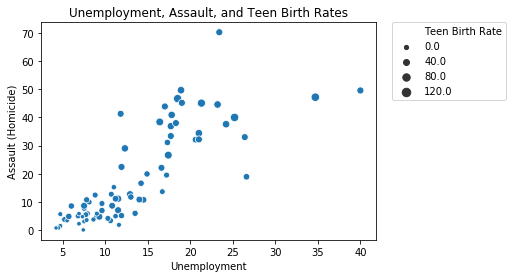

In [87]:
g = sns.scatterplot(x='Unemployment', y='Assault (Homicide)', data=health, size='Teen Birth Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Unemployment, Assault, and Teen Birth Rates')
#plt.text(x+0.3, y+0.3, 'Community Area Name', fontsize=9)

This scatterplot displays the relationship between unemployment, assault and teen birth rates. 
There seems to be a strong correlation between these three factors 

In [88]:
#get top 10 and bottom 10 lung cancer rates
top10lung = health.nlargest(10, ['Lung Cancer'])
top10lung.loc[:,'Ranking'] = 'Top 10'

In [89]:
bot10lung = health.nsmallest(10, ['Lung Cancer'])
bot10lung.loc[:,'Ranking'] = 'Bottom 10'

In [90]:
seplung = [top10lung, bot10lung] 
tenlung = pd.concat(seplung)

Text(0.5, 0, 'Community')

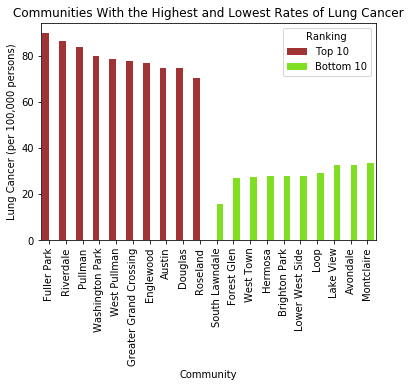

In [91]:
sns.barplot(x='Community Area Name', y = 'Lung Cancer', data = tenlung, hue = 'Ranking', palette=['firebrick', 'chartreuse'])
plt.xticks(rotation='vertical')
plt.title('Communities With the Highest and Lowest Rates of Lung Cancer')
plt.ylabel('Lung Cancer (per 100,000 persons)')
plt.xlabel('Community')

This barplot displays the disparity in lung cancer rates within the City of Chicago. The neighborhoods with the highest lung cancer rates have rates that are almost twice the rate of the neighborhoods with the lowest lung cancer rates. In fact, Fuller park, which is the neighborhood with the highest lung cancer rate, has over 4 times the lung cancer rate of South Lawndale, which is the neighborhood with the lowest lung cancer rate in Chicago. This is a serious disparity within the city and should be made a priority.  

In [92]:
#businesses['BUSINESS ACTIVITY'].value_counts()

In [93]:
tobacco = pd.read_csv('tobacco.csv')

In [94]:
value_counts = tobacco['Neighborhood'].value_counts()

In [95]:
tobacneigh = value_counts.rename_axis('Community Area Name').reset_index(name='tobacco')

In [96]:
health = health.merge(tobacneigh, on = 'Community Area Name')

Text(0.5, 1.0, 'Cancer and Stroke Rates Compared to Tobacco Sellers')

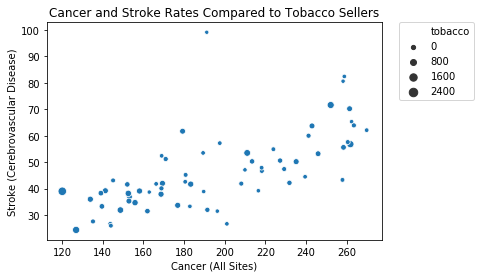

In [97]:
g = sns.scatterplot(x='Cancer (All Sites)', y='Stroke (Cerebrovascular Disease)', data=health, size='tobacco')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Cancer and Stroke Rates Compared to Tobacco Sellers')

This scatter plot displays the relationship between stroke rates, cancer rates, and the number of tobacco sellers within a neighborhood. There seems to be a minor positive correlation between stroke and cancer rates. However, it is interesting to note that two neighborhoods with a relatively high number of tobacco sellers have relatively low stroke and cancer rates. This is rather unexpected, but I suspect they are neighborhoods where people may work, but not live in, inflating the number of tobacco sellers, and deflating the stroke and cancer rates. 

Text(0.5, 1.0, 'Lung Cancer and Stroke Rates Compared to Tobacco Sellers')

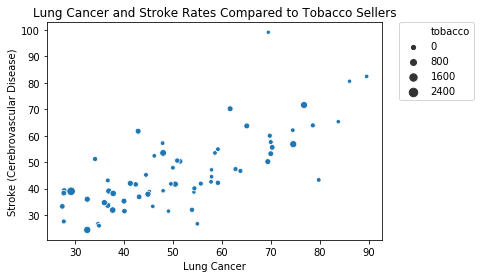

In [98]:
g = sns.scatterplot(x='Lung Cancer', y='Stroke (Cerebrovascular Disease)', data=health, size='tobacco')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Lung Cancer and Stroke Rates Compared to Tobacco Sellers')

This scatter plot describes the relationship between stroke rates, lung cancer rate, and the number of tobacco sellers within the neighborhood. There is a stronger positive correlation between stroke and lung cancer rates compared to stroke and all cancer rates. Noticeably, there does not seem to be much of a correlation with the number of tobacco sellers within a neighborhood. 

In [99]:
child = pd.read_csv('Child.csv')

In [100]:
value_counts = child['Neighborhood'].value_counts()

In [101]:
childneigh = value_counts.rename_axis('Community Area Name').reset_index(name='Childcare')

In [102]:
health = health.merge(childneigh, on = 'Community Area Name')

Text(0.5, 1.0, 'Prenatal Care and Infant Mortality Rates Compared to Children Related Businesses')

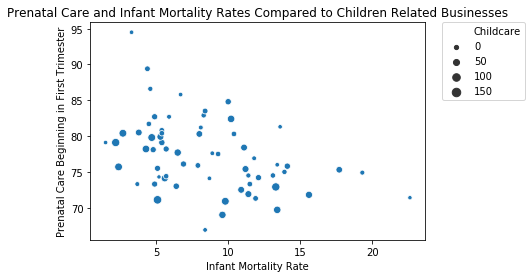

In [103]:
g = sns.scatterplot(x='Infant Mortality Rate', y='Prenatal Care Beginning in First Trimester', data=health, size='Childcare')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Prenatal Care and Infant Mortality Rates Compared to Children Related Businesses')

This Scatter plot describes the relationship between prenatal care beginning in the first trimester, infant mortality rate, and any child related business, which includes tutoring operations, daycare centers etc. There seems to be a negative correlation between prenatal care starting in the first semester and infant mortality rate. This logically makes sense. However it seems to be that the lower the rate of prenatal care beginning in the first trimester, the more child related businesses are within the neighborhood. This is remarkable and may merit further inspection. 